# Load the data

In [ ]:
# Import modules
from sklearn import datasets
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset
iris = datasets.load_iris()

print(iris)

In [ ]:
# Transform the dataset in dataframe
dfIris = pd.DataFrame(
        data = np.c_[iris.data, iris.target],
        columns = iris.feature_names + ["target"]
        )
dfIris["target"] = dfIris["target"].astype("category")
dfIris["target"] = dfIris["target"].cat.rename_categories(iris.target_names)

print(dfIris.to_markdown())

In [ ]:
# Prepare data (training and testing sets)
from sklearn.model_selection import train_test_split
X = dfIris.drop("target", 1)
y = dfIris["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1) # random state for repeatability

print(Xtrain, type(Xtrain))
print(ytrain, type(ytrain))

# Kmeans

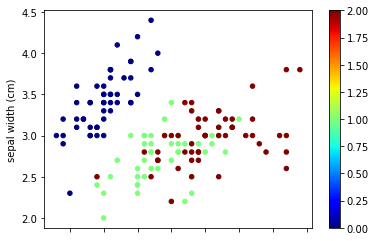

In [ ]:
dfIris.plot.scatter(x = "sepal length (cm)", y = "sepal width (cm)", c=iris.target, colormap="jet")

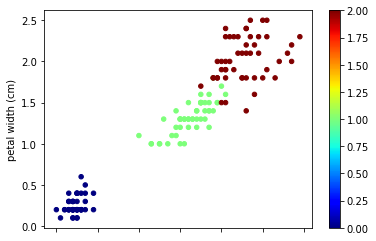

In [ ]:
dfIris.plot.scatter(x = "petal length (cm)", y = "petal width (cm)", c=iris.target, colormap="jet")

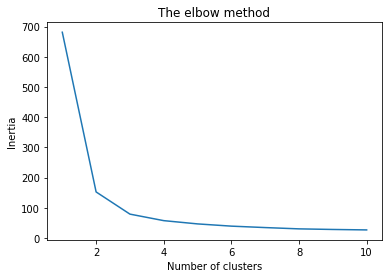

In [ ]:
# Prepare data
X_km = dfIris.drop("target",1)

# Find optimal number of clusters
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X_km)
    inertia.append(kmeans.inertia_)
    
# Plot results onto line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(X_km)

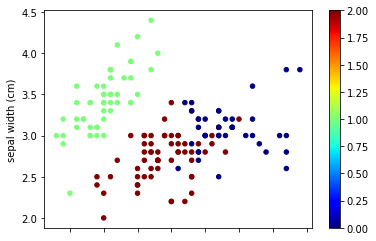

In [ ]:
X_km.plot.scatter(x = "sepal length (cm)", y = "sepal width (cm)", c=y_kmeans, colormap="jet")

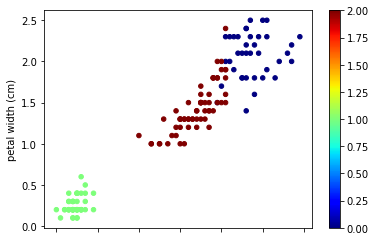

In [ ]:
X_km.plot.scatter(x = "petal length (cm)", y = "petal width (cm)", c=y_kmeans, colormap="jet")

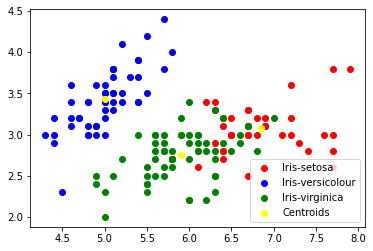

In [ ]:
plt.scatter(X_km.values[y_kmeans == 0, 0], X_km.values[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(X_km.values[y_kmeans == 1, 0], X_km.values[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_km.values[y_kmeans == 2, 0], X_km.values[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')

plt.legend()

# DBSCAN

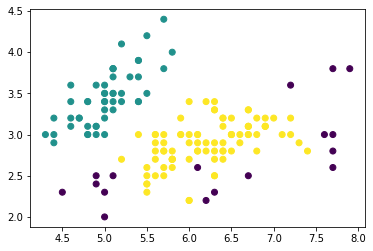

In [ ]:
# Import model
from sklearn.cluster import DBSCAN

# Create instance of model
DBS = DBSCAN(eps = 0.5)

# Prepare data
X_DBS = dfIris.drop("target",1)

# Train model
y_DBS = DBS.fit_predict(X_DBS)

# Predict clusters
plt.scatter(dfIris["sepal length (cm)"], dfIris["sepal width (cm)"], c=y_DBS)
plt.show()

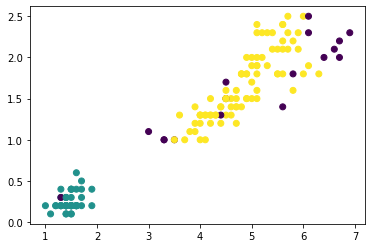

In [ ]:
plt.scatter(dfIris["petal length (cm)"], dfIris["petal width (cm)"], c=y_DBS)
plt.show()